# Part II - Ford GoBike: Uncovering Trends in Bike-Sharing Usage
## by Obay Rashad

## **Investigation Overview**  

### **Goals of the Presentation**  
This analysis aims to uncover key trends in Ford GoBike's trip data, focusing on trip duration, user demographics, and riding patterns. By examining factors like age, gender, user type, and peak usage times, we can better understand **who uses the service, how they use it, and what factors influence trip duration.**  

### **Key Insights (Executive Summary)**  
- **Subscribers vs. Customers:** Subscribers take shorter, more frequent trips, likely for commuting, while Customers have longer, more varied rides.  
- **Age Distribution:** The majority of riders are aged **25-40**, with a peak around **30-35 years old**.  
- **Gender Disparity:** **Male subscribers dominate the dataset,** significantly outnumbering female and other gender users.  
- **Trip Duration Patterns:** There is **no strong correlation between trip duration and user age or starting location.**  
- **Peak Usage Times:** **Rush hours (7-9 AM, 4-6 PM) see the highest trip counts,** suggesting heavy commuter use.  



In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike.csv')

### What is the age distribution of users?

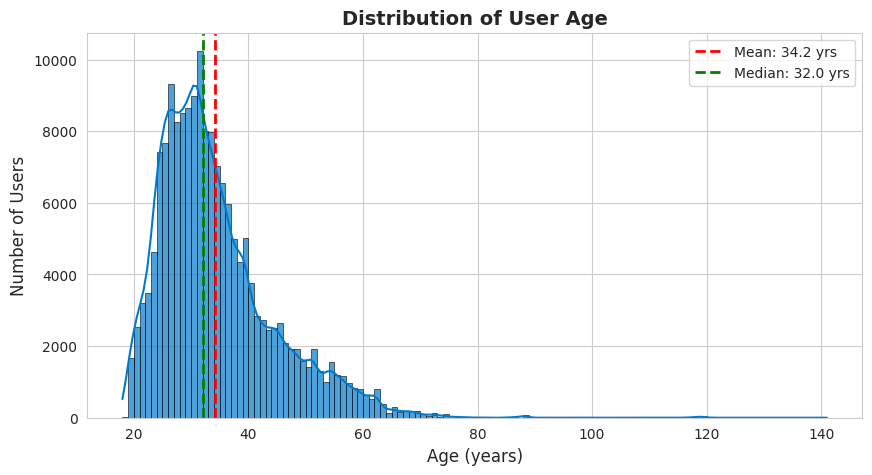

In [5]:
# Plotting age distribution derived from member's birth year.
end_year = 2019
df['age'] = end_year - df['member_birth_year'].astype(float)

binsize = 1
bins = np.arange(df['age'].min(), df['age'].max() + binsize, binsize)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

ax = sns.histplot(df['age'].dropna(), bins=bins, kde=True, color="#007acc", edgecolor="black", alpha=0.7)

mean_age = df['age'].mean()
median_age = df['age'].median()

# Add vertical lines for mean and median
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.1f} yrs')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.1f} yrs')

plt.title('Distribution of User Age', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend()

plt.show()

- The age distribution is right-skewed, meaning most users are concentrated in the younger age groups.

- The highest concentration of users falls between approximately 30-40 years old.

- There are users above 80, with a few extreme outliers approaching 120+ years, which may indicate incorrect data entries.

### Which user type (Customer or Subscriber) tends to have longer trip durations, on average?

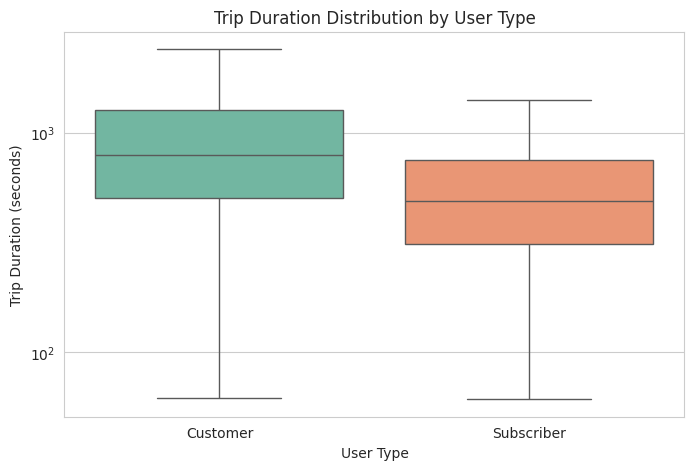

In [6]:
plt.figure(figsize=(8, 5), dpi=100)
sns.boxplot(x=df['user_type'], y=df['duration_sec'], showfliers=False, palette="Set2")

plt.yscale('log')  # Log scale to handle extreme values
plt.xlabel("User Type")
plt.ylabel("Trip Duration (seconds)")
plt.title("Trip Duration Distribution by User Type")

plt.show()


Insights:

Customers take longer trips (usually): The middle line (median) and the whole box for "Customer" are higher up than for "Subscriber." This means customers, in general, have longer trips.

Customers have more varied trip lengths: The "Customer" box is taller, and its "whiskers" stretch out much further. This shows a wider spread in trip times.

Subscribers are more consistent: Subscribers have a shorter, tighter box, meaning their trip durations are more clustered together, and thus more predictable.

### How does the distribution of user types (Customer vs. Subscriber) vary across different genders (Male, Female, Other)?

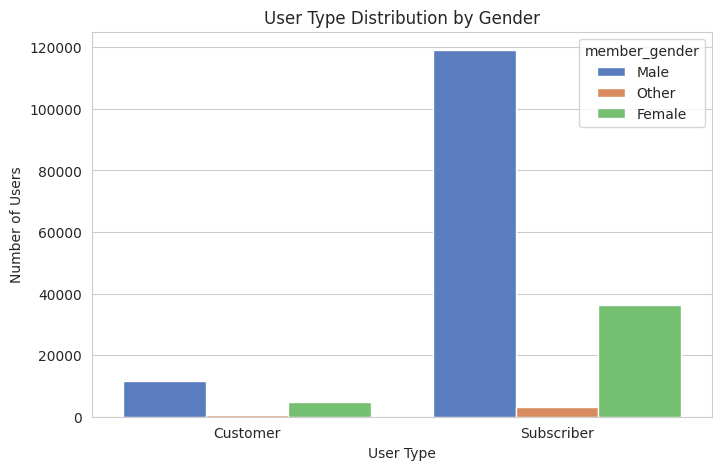

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x="user_type", hue="member_gender", data=df, palette="muted")

plt.xlabel("User Type")
plt.ylabel("Number of Users")
plt.title("User Type Distribution by Gender")

plt.show()

Insights:

- Subscribers are significantly more prevalent than Customers.

- Among Subscribers, Males are by far the largest group, exceeding the combined total of Female and Other genders.